In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("house_price_preprocessing.csv")

In [4]:
df

,Unnamed: 0,지역명,규모구분,연도,월,분양가격
0,0,서울,전체,2015,10,5841
1,1,서울,전용면적 60㎡이하,2015,10,5652
2,2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...,...
4500,4500,제주,전체,2020,2,3955
4501,4501,제주,전용면적 60㎡이하,2020,2,4039
4502,4502,제주,전용면적 60㎡초과 85㎡이하,2020,2,3962
4503,4503,제주,전용면적 85㎡초과 102㎡이하,2020,2,0


In [13]:
# '분양가격' 열에서 값이 0인 것들을 모두 출력
df.loc[ df['분양가격'] == 0]

,Unnamed: 0,지역명,규모구분,연도,월,분양가격
28,28,광주,전용면적 85㎡초과 102㎡이하,2015,10,0
29,29,광주,전용면적 102㎡초과,2015,10,0
34,34,대전,전용면적 102㎡초과,2015,10,0
81,81,제주,전용면적 60㎡이하,2015,10,0
113,113,광주,전용면적 85㎡초과 102㎡이하,2015,11,0
...,...,...,...,...,...,...
4461,4461,세종,전용면적 60㎡이하,2020,2,0
4488,4488,전남,전용면적 85㎡초과 102㎡이하,2020,2,0
4493,4493,경북,전용면적 85㎡초과 102㎡이하,2020,2,0
4499,4499,경남,전용면적 102㎡초과,2020,2,0


In [14]:
# 분양가격이 0인 행의 index 모두 가져오기
idx = df.loc[ df['분양가격'] == 0].index

idx

Int64Index([  28,   29,   34,   81,  113,  114,  119,  166,  198,  199,
            ...
            4418, 4448, 4453, 4458, 4459, 4461, 4488, 4493, 4499, 4503],
           dtype='int64', length=320)

In [15]:
# idx 행들을 drop, 행은 axis=0 (열은 axis=1)
df = df.drop(idx, axis=0)

In [19]:
# numpy의 브로드 캐스트 개념 이용(모든 열 한꺼번에 사칙연산 가능)
df['분양가격'] = df['분양가격']/3.3


# 열 이름을 '분양가격'을 '평당 분양가격'으로 변경
df = df.rename(columns={'분양가격': '평당 분양가격'})

df

,Unnamed: 0,지역명,규모구분,연도,월,평당 분양가격
0,0,서울,전체,2015,10,1770.000000
1,1,서울,전용면적 60㎡이하,2015,10,1712.727273
2,2,서울,전용면적 60㎡초과 85㎡이하,2015,10,1782.424242
3,3,서울,전용면적 85㎡초과 102㎡이하,2015,10,1733.636364
4,4,서울,전용면적 102㎡초과,2015,10,1781.515152
...,...,...,...,...,...,...
4500,4500,제주,전체,2020,2,1198.484848
4501,4501,제주,전용면적 60㎡이하,2020,2,1223.939394
4502,4502,제주,전용면적 60㎡초과 85㎡이하,2020,2,1200.606061
4503,4503,제주,전용면적 85㎡초과 102㎡이하,2020,2,0.000000


In [20]:
# 그래프 출력 시 이상한 에러들 무시
import warnings
warnings.filterwarnings("ignore")


# 그래프 그릴 때 한글 깨짐 방지 설정
import os

# Mac OS의 경우와 그 외 OS의 경우로 나누어 설정

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")

else:
    plt.rc("font", family="Malgun Gothic")


# 그래프 사이즈 설정
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [22]:
# '지역명'으로 묶어서 '분양가격'의 평균을 나타냄
df.groupby('지역명')['평당 분양가격'].mean()

지역명
강원     709.032590
경기    1234.141795
경남     836.750143
경북     737.008576
광주     742.644940
대구    1072.400229
대전     751.253288
부산    1115.127501
서울    2189.624929
세종     853.060034
울산     553.364208
인천    1084.373928
전남     687.932533
전북     703.654660
제주     902.850772
충남     723.734706
충북     702.082333
Name: 평당 분양가격, dtype: float64

<AxesSubplot:xlabel='지역명', ylabel='평당 분양가격'>

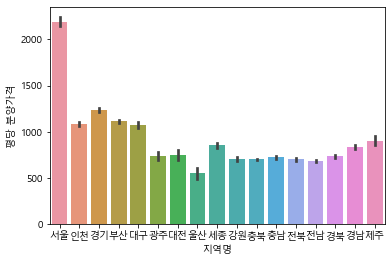

In [23]:
# seaborn 패키지로 막대 그래프 그리기
sns.barplot(x='지역명', y='평당 분양가격', data=df)

<AxesSubplot:xlabel='연도', ylabel='평당 분양가격'>

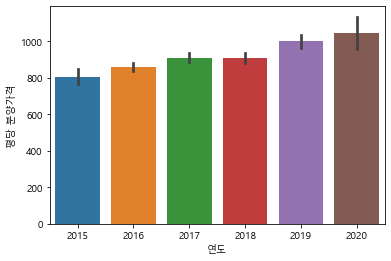

In [24]:
sns.barplot(x='연도', y='평당 분양가격', data=df)